# U-Net Baseline Model Improvements

In this notebook, we take the U-Net baseline model (as presented in tutorial 10) as a starting point and build upon it by introducing one improvement after the other.

In [1]:
import os
from glob import glob

from src.utils import *
from src.models import UNet
from src.pytorch_utils import *

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# get filenames of all the training samples from the original dataset
image_fns = sorted(glob(os.path.join("training", "images", "*.png")))
mask_fns = sorted(glob(os.path.join("training", "groundtruth", "*.png")))

### Original Configuration

Let us train the baseline model using the exact same configuration as shown during tutorial 10.

In [ ]:
unet = UNet().to(device)
history = train_model(
    model=unet,
    image_fns_train=image_fns[:-10],
    mask_fns_train=mask_fns[:-10],
    image_fns_val=image_fns[-10:],
    mask_fns_val=mask_fns[-10:],
    n_epochs=35,
    batch_size=4,
)

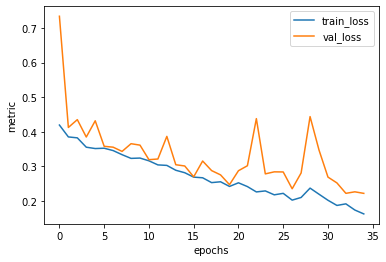

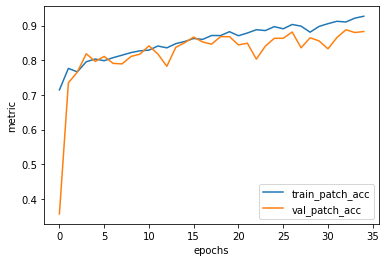

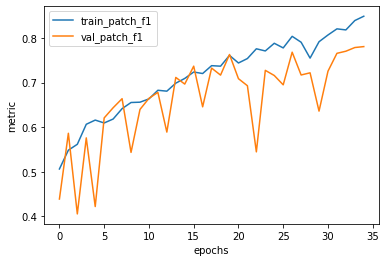

In [4]:
plot_training_history(history)

In [ ]:
preds = predict_on_test_set(unet, submission_fn="unet_baseline.csv")
plot_predictions(preds)